# Sound Proessing Demo

## Demo Instructions
1. Read in a sound file in a standard sound format (.wav, .mp3, …) and an array. Be sure to keep track of the sampling rate for later.
2. Plot the sound waveform from the array data. Be sure to plot the time axis appropriately. (optional: if you can play the sound, do that too)
3. For a portion of the sound, plot the sound clip. Again, use the right units for the axis labels. Also show the associated values in the array.
4. Plot the fourier spectrum for the clip of sound. The y axis will be amplitude. Try to set up the x-axis from low frequency on the left to high frequency on the right with the x axis appropriately labeled with using Hertz)
5. Pick 3 sounds that vary in pitch (or 3 portions of the sound you read before). Plot the fourier spectrum for each so one can see that the higher pitch sounds tend to have a higher fourier spectrum.

Here is a helpful blog post: [http://samcarcagno.altervista.org/blog/basic-sound-processing-r/](http://samcarcagno.altervista.org/blog/basic-sound-processing-r/)

## 1. Read in a sound file in a standard sound format (.wav, .mp3, …) and an array. Be sure to keep track of the sampling rate for later.

* Install the sound package with the following in your RStudio console:

>install.packages('tuneR', dep=TRUE)

Continue coding:

In [4]:
library(tuneR)
mpt <- readMP3("bensound-buddy.mp3") # this will take a while, its a big file
                                     # music from bensound.com
str(mpt) # just checking the structure of mpt, note the sampling rate is in there
mpt@samp.rate

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:5385600] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:5385600] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


[1] 44100

## 2. Plot the sound waveform from the array data. Be sure to plot the time axis appropriately. (optional: if you can play the sound, do that too)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:441001] -18502 -18529 -18356 -18350 -18046 -17193 -15938 -14252 -12418 -10824 ...
  ..@ right    : int [1:441001] -17440 -16812 -16212 -15975 -15749 -15310 -14349 -12541 -10625 -9395 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


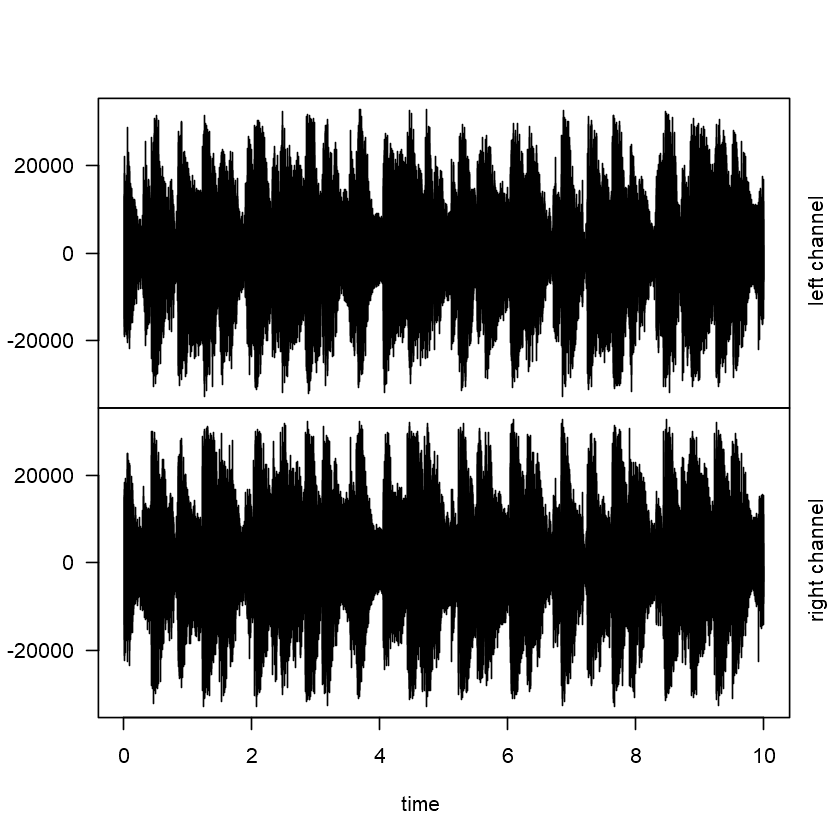

In [6]:
om <- extractWave(mpt, from = 60, to = 70, xunit = "time") # extract 10s from 1 min of mpt
str(om)
plot(om)

## 3. For a portion of the sound, plot the sound clip. Again, use the right units for the axis labels. Also show the associated values in the array.
Since we are working with an mp3 file that is in stereo format, the right and left ears hear different sounds. There are right and left channels that reflect this property.

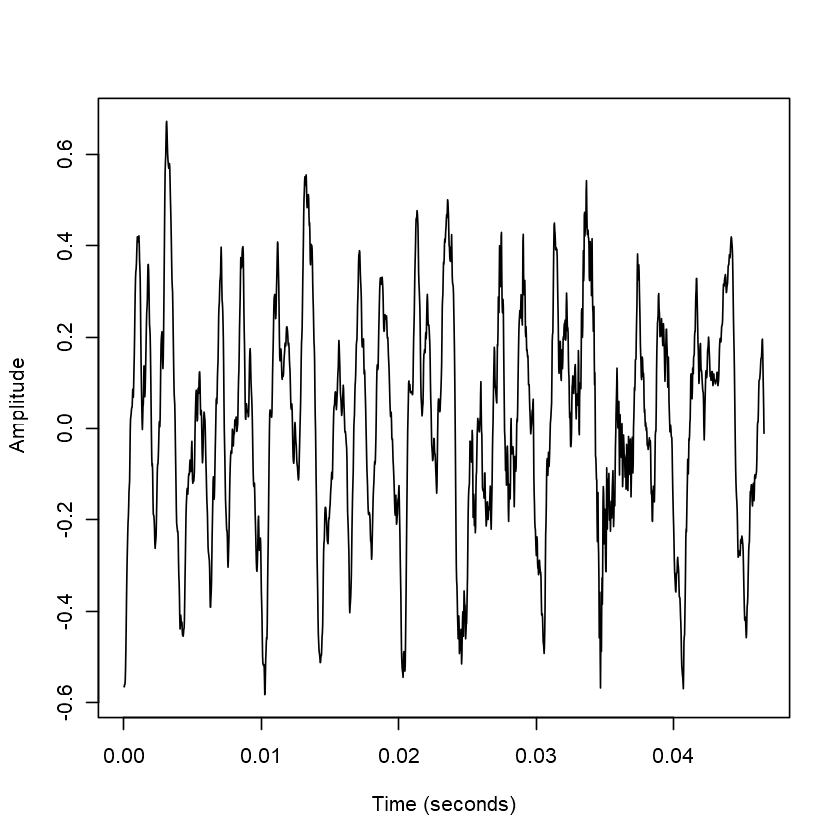

In [7]:
# Select the left channel.
om_left <- om@left

# Select the first 2056 points. Its ideal to select an exact power of 2.
om_left <- om_left / 2^(om@bit -1)# Normalizes 16-bit format
om_left <- om_left[1:2056]


# Create an array containing time points.
timeArray <- (0:(length(om_left)-1)) / om@samp.rate
# Plot the tone.
plot(timeArray, om_left, type='l', col='black', xlab='Time (seconds)', ylab='Amplitude')

In [8]:
# Show associated array values
om_left[1:10]

[1] -0.5646362 -0.5654602 -0.5601807 -0.5599976 -0.5507202 -0.5246887
 [7] -0.4863892 -0.4349365 -0.3789673 -0.3303223

## 4. Plot the fourier spectrum for the clip of sound. The y axis will be amplitude. Try to set up the x-axis from low frequency on the left to high frequency on the right with the x axis appropriately labeled with using Hertz)
The fourier transformation was discovered by Jean-Baptiste Joseph Fourier in 1822. It is a mathematical operation displays the pitches within a sound. A pitch is a certain frequency, measured in Hertz (Hz).

The fourier spectrum displays all pitches and all frequencies that form a particular sound.

The fast fourier transformation is the implementation of the fourier transformation in a computer.

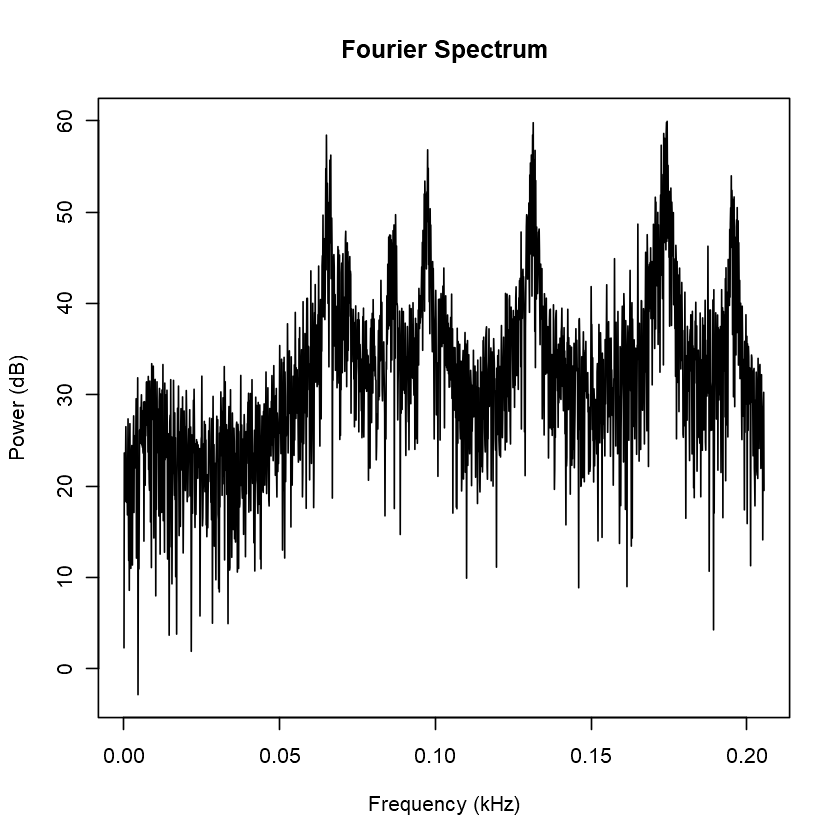

In [9]:
# Begin the fourier function.
myfourier <- function(sndobj) {
  
# Find length of sound object.
	n <- length(sndobj@left)
# Perform fast fourier transformation.
	p <- fft(sndobj@left) 
 
# For efficiency, select the number of points to be a power	of 2.
nUniquePts <- 2056
p <- p[1:nUniquePts]
p <- abs(p)     # Take the absolute value/magnitude 
p <- p / n        # Normalize data
p <- p^2         # Square it to get power spectrum
p[2: (length(p) -1)] <- p[2: (length(p) -1)]*2
# We've got even number of points to fft.


# Create frequency array.
freqArray <- (0:(nUniquePts-1)) * (sndobj@samp.rate / n) 



    # Plot frequency array.
plot(freqArray/1000, 10*log10(p), type='l', col='black',	xlab='Frequency (kHz)', ylab='Power (dB)', main="Fourier Spectrum")
}
 # End of myfourierf()
myfourier(om)

## 5. Pick 3 sounds that vary in pitch (or 3 portions of the sound you read before). Plot the fourier spectrum for each so one can see that the higher pitch sounds tend to have a higher fourier spectrum.

Download this low pitch sound: http://soundbible.com/1594-Fog-Horn.html
Be sure to put it in your working directory.


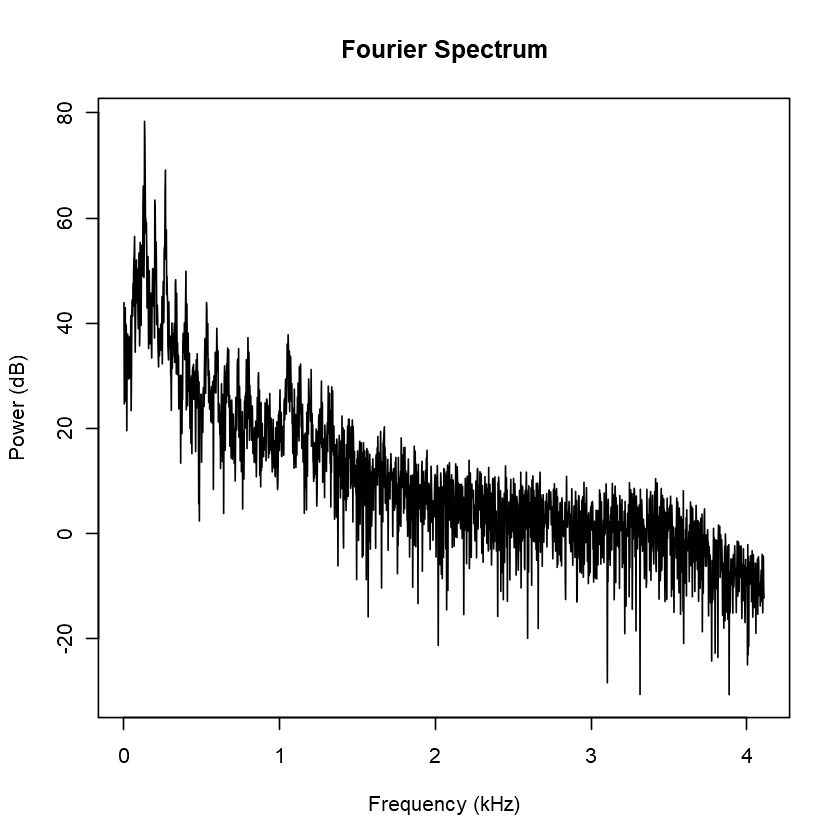

In [11]:
foghorn <- readMP3("FogHorn.mp3")
samplefoghorn <- extractWave(foghorn, from = 0, to = 0.5, xunit= "time")
myfourier(samplefoghorn)

Download this medium pitch: http://soundbible.com/1817-Party-Horn.html

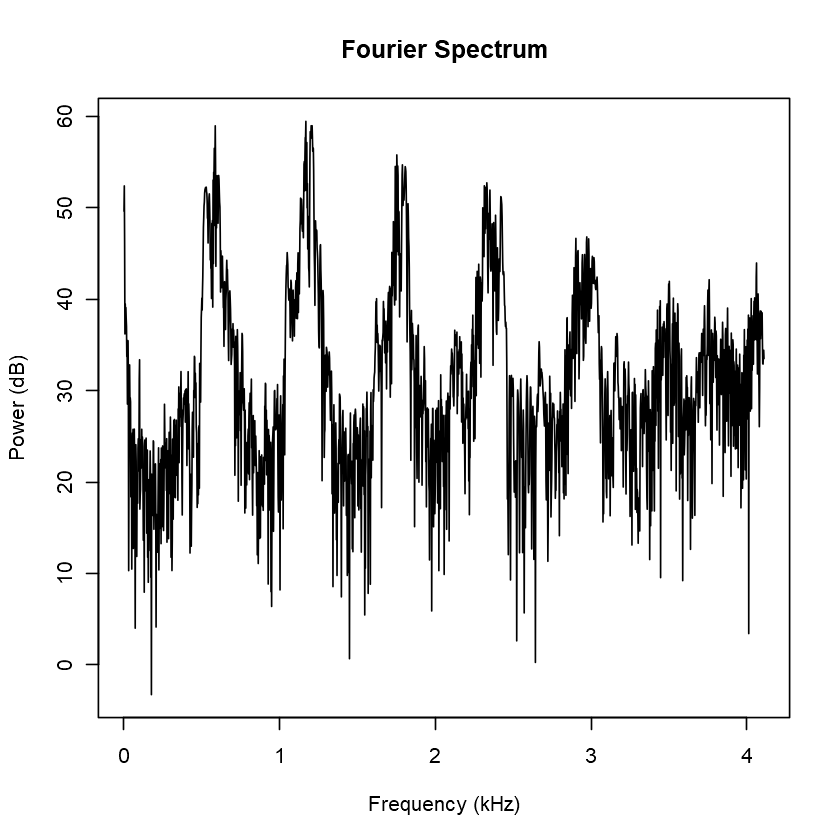

In [12]:
partyhorn <- readMP3("PartyHorn.mp3")
samplepartyhorn <- extractWave(partyhorn, from = 0, to = 0.5, xunit = "time")
myfourier(samplepartyhorn)

Download this high pitch sound: http://soundbible.com/1125-High-Pitch-Dog-Whistle.html

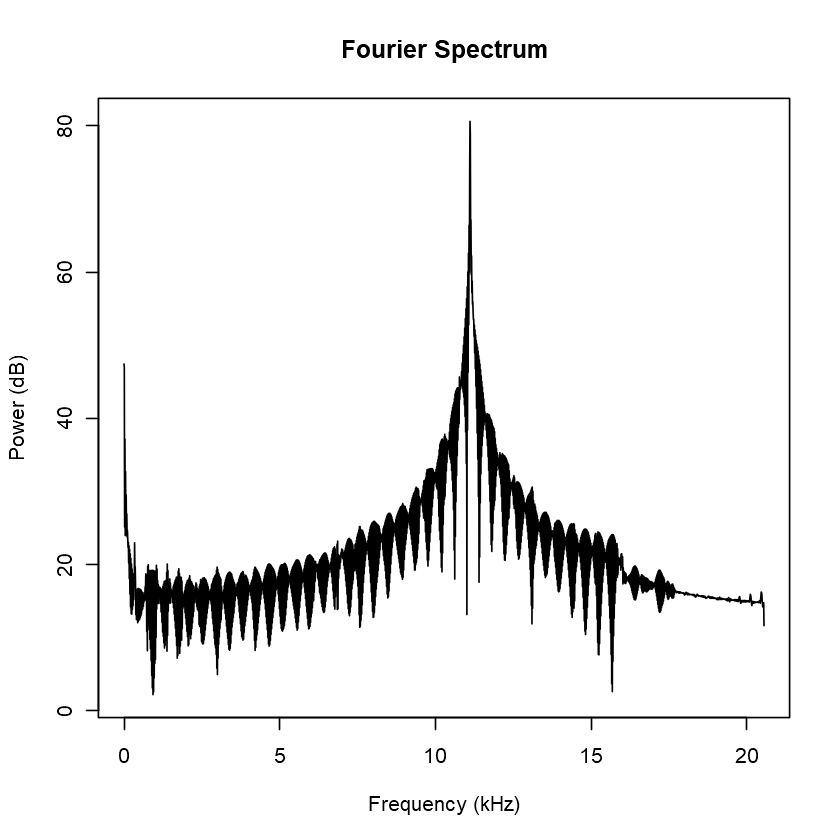

In [13]:
dogwhistle <- readMP3("DogWhistle.mp3")
sampledogwhistle <- extractWave(dogwhistle, from = 0, to = 0.1, xunit = "time") 
myfourier(sampledogwhistle)